In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import pickle


In [ ]:
df= pd.read_csv('../csv/after_cleaning/mubawab_tayara_menzili_final.csv')
df.head()

,delegation,superficie,nb_pieces,chambres,salle_de_bains,etage,gouvernorat_ariana,gouvernorat_ben-arous,gouvernorat_la-manouba,gouvernorat_tunis,prix
0,9.0,88.0,3.0,2,1,1,0.0,0.0,0.0,1.0,340000.0
1,23.0,100.0,2.0,2,1,1,0.0,0.0,0.0,1.0,135000.0
2,33.0,152.0,2.0,2,1,1,0.0,0.0,0.0,1.0,680000.0
3,33.0,120.0,2.0,1,1,1,0.0,0.0,0.0,1.0,470000.0
4,28.0,145.0,4.0,3,1,4,0.0,0.0,0.0,1.0,260000.0


**train test split**

NOTE: Tree-based models are not affected by the scale of features because they split based on feature thresholds

In [13]:
X= df.drop(columns='prix')

y= df['prix']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=77)

# Decision Tree

**parameters tuning**

In [14]:

# Hyperparameters to tune
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Grid Search
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)


Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Best parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV score: 0.6505465548190639


/home/lost-elf/Apartments-Sales/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
450 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
204 fits failed with the following error:
Traceback (most recent call last):
  File "/home/lost-elf/Apartments-Sales/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lost-elf/Apartments-Sales/venv/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/lost-elf/Apartments-Sales/venv/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validat

In [15]:
model= DecisionTreeRegressor(**grid_search.best_params_)

model.fit(X_train, y_train)

y_hat= model.predict(X_test)

In [16]:
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
mape=mean_absolute_percentage_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R²: {r2}")

Mean Absolute Error (MAE): 117734.95951348152
Root Mean Squared Error (RMSE): 185890.34741843762
Mean Squared Error (MSE): 34555221263.34744
Mean Absolute Percentage Error (MAPE): 0.3347924988220387
R²: 0.6910172784776172


In [17]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Train metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display results
print("===== Training Metrics =====")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\n===== Testing Metrics =====")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.4f}")
print(f"R²: {r2_test:.4f}")


===== Training Metrics =====
Mean Absolute Error (MAE): 118246.5067
Root Mean Squared Error (RMSE): 202884.2606
Mean Squared Error (MSE): 41162023190.6569
Mean Absolute Percentage Error (MAPE): 0.3254
R²: 0.6896

===== Testing Metrics =====
Mean Absolute Error (MAE): 117734.9595
Root Mean Squared Error (RMSE): 185890.3474
Mean Squared Error (MSE): 34555221263.3474
Mean Absolute Percentage Error (MAPE): 0.3348
R²: 0.6910


**R² is around 70% , this means the model explains about 70% of the variance in apartment prices.
The higher the R², the better the model’s fit to the data.**

**cross validation**

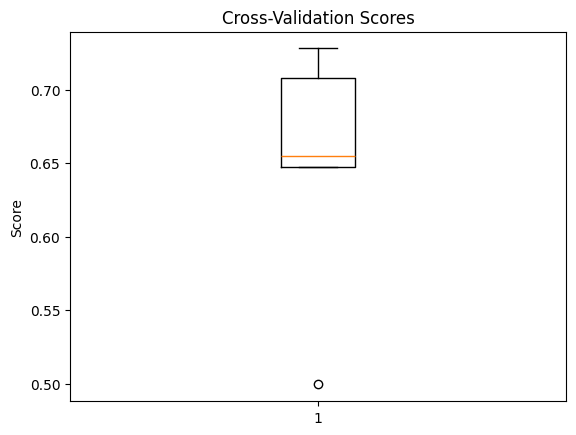

Average CV Score: 0.6475186592385832


In [18]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Plotting the cross-validation scores
plt.boxplot(cv_scores)
plt.title('Cross-Validation Scores')
plt.ylabel('Score')
plt.show()

print(f'Average CV Score: {cv_scores.mean()}')


**learning curve**

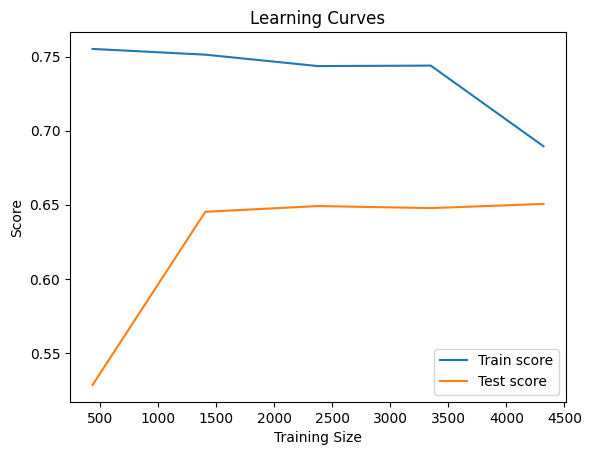

In [19]:

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()


**compress model**

In [ ]:
# save object to pickle file
with open(r"./compressed_models/decision_tree_model.pickle", "wb") as fout:


Object my_tree saved at decision-tree-model.pickle


In [23]:
# open pickle file and load
with open(r"./compressed_models/decision_tree_model.pickle", "rb") as fin:
    tree_loaded = pickle.load(fin)
# display loaded object
print(tree_loaded)


DecisionTreeRegressor(max_depth=5, min_samples_leaf=4)


In [24]:
tree_loaded.predict(X_test)

array([242235.97920605, 170248.90070922, 875575.86348123, ...,
       170248.90070922, 683365.44723618, 225823.82608696])